Initially, the data was separated by month. This meant that if a single contests started on the last day of the month and continued into the next month, its data would be in two separate places. This file reorganizes the data into chunks, so that the entirety of each contest fits in its chunk

This also generates a ChunkMap that contest IDs the chunk that the time series data for each contest is in.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from ipywidgets import IntProgress

In [2]:
dirList = os.listdir("data/Chunks_Raw/")
fList = []
for filename in dirList: 
    if(filename[-4:] == '.csv'): #limit to .csv files
        fList.append(filename[:]) 

IntProgress(value=0, max=42)

Text(0,0.5,'File#')

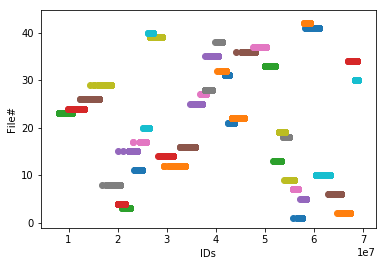

In [3]:
## This combines all available chunks into a single dataframe
f = IntProgress(min=0, max=len(fList))
display(f)

i = 0
allIDs = []
empty=True
fullDF = -1
for file in fList[:]:
    i+=1
    fDF = pd.read_csv("data/Chunks_Raw/"+file)
    fDF.columns = ['ContestId', 'MinutesRemaining', 'Entries']
    if(empty):
        fullDF = fDF
        empty = False
    else:
        fullDF = pd.concat([fullDF,fDF])
    ids = fDF.ContestId.unique()
    allIDs = allIDs + list(ids)
    ammounts = [i]*len(ids)
    plt.scatter(ids, ammounts)
    f.value+= 1
plt.xlabel("IDs")
plt.ylabel("File#")

In [4]:
## This method will take a list and separate it into a two dimensional list 
## where the inner lists have no more than N
def chunkify(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

In [8]:
## Splits the huge DF of data into individual DFs of 10000
i = 0
idMap, dfChunks = {}, []
chunks = list(chunkify(allIDs, 10000))

f = IntProgress(min=0, max=len(chunks))
display(f)

for chunk in chunks[:]:
    i += 1
    idMap["chunk"+str(i)] = chunk
    subDF = fullDF[fullDF['ContestId'].isin(chunk)]
    dfChunks.append(subDF)
    f.value += 1

IntProgress(value=0, max=65)

Text(0,0.5,'Number of entries')

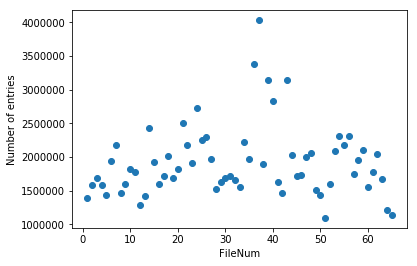

In [9]:
## Graph of Number of entries per file
fileNum, count = [], []
i = 0
for df in dfChunks:
    i+=1
    fileNum.append(i)
    count.append(len(df))
plt.scatter(fileNum, count)
plt.xlabel("FileNum")
plt.ylabel("Number of entries")

In [7]:
i = 0
for df in dfChunks:
    i+=1
    df.to_csv("Data/Chunks/chunk"+str(i)+".csv")

In [8]:
fullMap = []
for m in list(idMap.keys()):
    idMap[m]
    for cid in idMap[m]:
        fullMap.append({"ContestId": cid, "Chunk": m})

In [9]:
mapDF =  pd.DataFrame(fullMap).set_index("ContestId")

In [10]:
mapDF.to_csv('data/ChunkMap.csv')